# Transport equation

## libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML

## initialization

In [2]:
check = 0.75

In [3]:
A = 0.015
LENGTH = 2.5
DURATION = 200
INITIAL = 0
BOUND = 0.5

NUMBER_X = 501
NUMBER_T = int(A * DURATION * NUMBER_X / check / LENGTH)

In [4]:
step_x = LENGTH / (NUMBER_X - 1)
step_t = DURATION / (NUMBER_T - 1)

In [5]:
axis = np.linspace(0, LENGTH, NUMBER_X)
time = np.linspace(0, DURATION, NUMBER_T)

function = pd.DataFrame(columns = np.concatenate([['x'], time]))

In [6]:
function['x'] = axis
function = function.set_index('x')

In [7]:
function.iloc[:, 0] = INITIAL
function.iloc[0] = BOUND
function.iloc[NUMBER_X-1, :] = INITIAL

## main procedure

In [8]:
pbar = tqdm_notebook(total = NUMBER_T - 1)

for t in range(0, NUMBER_T - 1):
    for x in range(1, NUMBER_X - 1):
        function.iloc[x, t+1] = 0.5 * (function.iloc[x+1, t] + function.iloc[x-1, t] - 
                              check * 0.5 * (np.power(function.iloc[x+1, t], 2) - np.power(function.iloc[x-1, t], 2)))
    pbar.update()

## animated plot

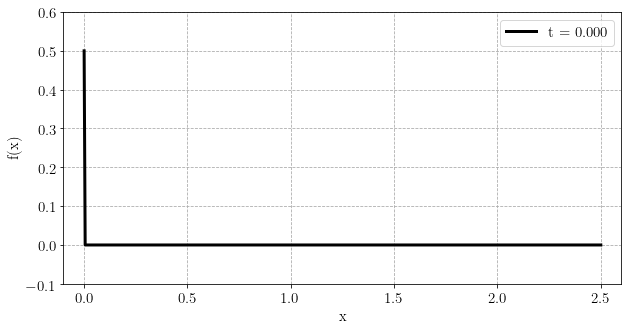

In [17]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis([-0.1, LENGTH + 0.1, -0.1, BOUND + 0.1])

l1, = ax.plot(function.index, function.iloc[:, NUMBER_T - 1], lw=3, color='black', label=NUMBER_T)
#l2, = ax.plot([ A * float(function.columns[20]), A * float(function.columns[20])],[0, BOUND], lw=3, color='blue', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(function.index, function.iloc[:, i])
    l1.set_label('t = ' + '%.3f' %(i * step_t))


    legend = plt.legend(loc='upper right')
    return l1, legend

ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, NUMBER_T - 1, 10), interval=100)

# ani.save("movie.mp4")
HTML(ani.to_jshtml())

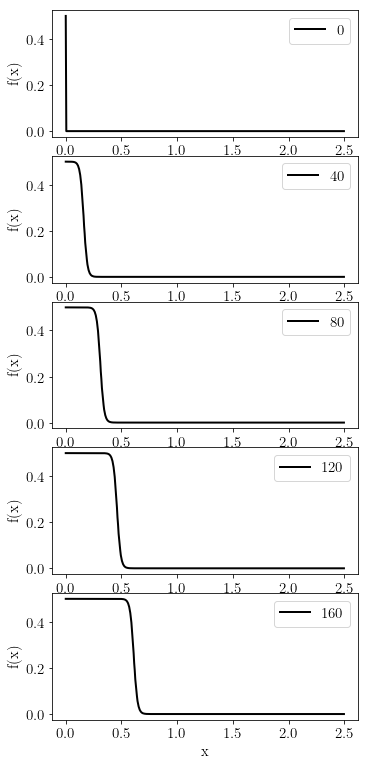

In [58]:
# for t in range(0,DURATION, 40):
#     plt.subplot(6, 1, t/40+1)
#     plt.plot(function.index * LENGTH / NUMBER_X, function.iloc[:, int((t) * NUMBER_T / DURATION)],
#                 c='black', lw=2, label=f"${t}$")
      
#     plt.legend(loc='upper right')
#     plt.xlabel(r'x')
#     plt.ylabel(r'f(x)')

# plt.subplots_adjust(top=1.4, bottom=0.08, left=0.10, right=0.95, hspace=0.15, wspace=0.2)